# **NAME - SHOBHIT SHARMA**

---
## **Task 1: Prediction using supervised Machine Learning**
### **Predict the percentage of a student based on the no. of study hours.**

In this task we have to find the students scores based on their study hours. This is simple regression problem type because it has only two variables. This problem can be solved by using regression libraries or we can make regression algorithm.



## **Importing the required libraries.**

In [1]:
#Importing requried packages and libraries

import pandas as pd
import numpy as np

#Importing visual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Importing for Error and Accuracy Calculations
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Importing for exporting our final model 
import pickle

## **Loading the Dataset**

In [2]:
#Loading dataset from remote url
url = 'http://bit.ly/w-data'
Data = pd.read_csv(url)
print('Data loaded successfully')

Data loaded successfully


## **Exploratory Data Analysis**

### **Top and Bottom Values of Dataset**

In [3]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### **Shape of Data**

In [5]:
Data.shape

(25, 2)

### **Data Information**

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From the above result we can clearly see that there is no null values and some values are int and sore are floats. So, while taking the input from user we have to take values as a float number

### **Statistical Properties of Dataset**

In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Unique Values**

In [8]:
Data.nunique()

Hours     23
Scores    23
dtype: int64

There are 23 unique values in this dataset. 

### **Data Visualization**

This is also an important part. By visulizing the data one can see which relation is best describe for that data.

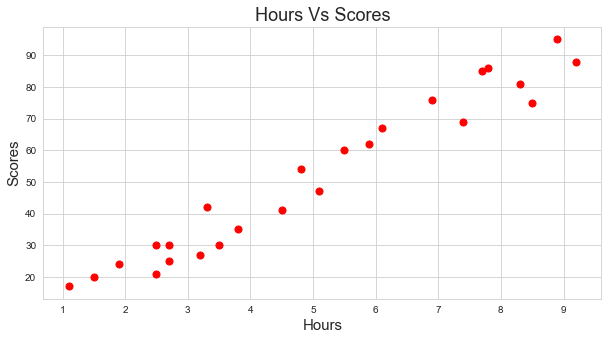

In [9]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,5))
plt.scatter(Data['Hours'],Data['Scores'],c='r',s=50 )
plt.xlabel("Hours", fontsize= 15)
plt.ylabel("Scores", fontsize= 15)
plt.title("Hours Vs Scores", fontsize= 18);

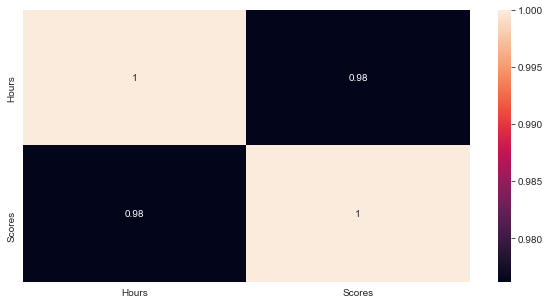

In [10]:
#Plotting correlation between feature and target

fig = plt.figure(figsize=(10,5))
sns.heatmap(Data.corr(), annot = True, linecolor='black');

From this one can clearly see that there is strong positive correlation.

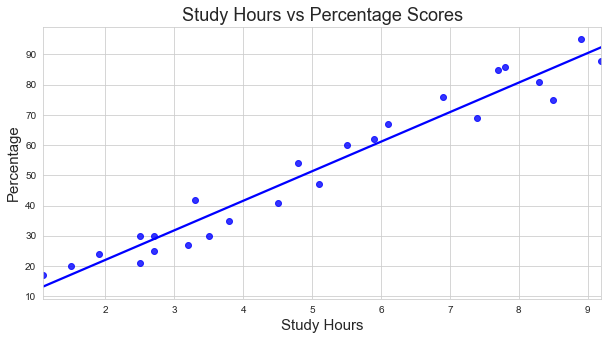

In [11]:
#Plotting regression plot to confirm above relationship between feature and target.

fig = plt.figure(figsize=(10,5))
sns.regplot(x=Data['Hours'],y=Data['Scores'],data=Data, color='b',ci=None)
plt.title('Study Hours vs Percentage Scores',fontsize=18);
plt.xlabel('Study Hours',fontsize=15);
plt.ylabel('Percentage',fontsize=15);
plt.show()

There is strong positive linear relation between the number of hours studied and percentage of score.


## **Data Prepration** 

### **Dividing Data**

Dividing data as input and output.

In [12]:
X = Data.drop('Scores',axis=1)
y = Data.Scores

### **Train-Test Split**
We dont have extra data for testing. So, we have to split the given data for training as well as testing. One can done this using "train_test_split()" inbuilt function of Scikit-Learn library. We gave the test size 24%.

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state =42 )

Now we have training and testing dataset.

## **Training**

We are directly using "LinearRegression()" from Scikit-Learn library. 

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

print("Training complete.")

Training complete.


In [15]:
print ("Coefficient -", model.coef_)
print ("Intercept - ", model.intercept_)

Coefficient - [9.60328059]
Intercept -  3.435969636534537


These Coefficient and Intersept values are used to predict the result.

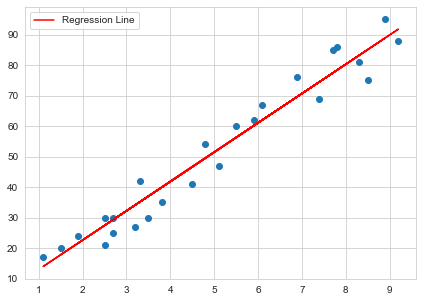

In [16]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.figure(figsize=(7,5))
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

## **Prediction**

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
Name: Scores, dtype: int64

In [19]:
#Comparing the original and predicted values
df=pd.DataFrame({'Original Score':y_test,'Predicted Score':y_pred})
df['Hours'] = X_test
df

,Original Score,Predicted Score,Hours
8,81,83.143199,8.3
16,30,27.444171,2.5
0,21,27.444171,2.5
23,76,69.698606,6.9
11,62,60.095325,5.9
9,25,29.364827,2.7


In [20]:
#Training and Testing Scores
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9475373814076595
Test Score: 0.9684201924053588


From this one can cleary see that we got very good accuracy.

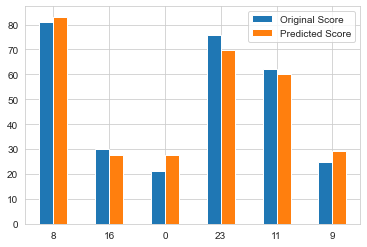

In [21]:
#plot of original and predicted values
df1=df.drop
df.drop('Hours',axis=1).plot(kind='bar',figsize=(6,4))
plt.xticks(rotation=0)
plt.show()

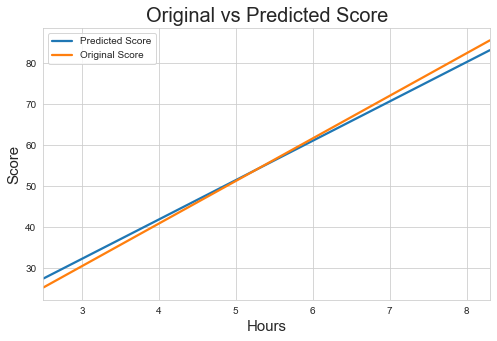

In [22]:
#Original vs Predcited Scores Regression Plot
fig = plt.figure(figsize=(8,5))
sns.regplot(y='Predicted Score',x='Hours',data=df,scatter=False,label='Predicted Score')
sns.regplot(y='Original Score',x='Hours',data=df,scatter=False , ci=None, label='Original Score')
plt.title('Original vs Predicted Score',fontsize = 20)
plt.ylabel('Score' , fontsize = 15)
plt.xlabel('Hours' , fontsize = 15)
plt.legend()


## **Testing**

Just give the value of Study hours to know the score.

In [23]:
# Testing with some new data

test= float(input('Enter no. of Hours : ' ))
test1 = np.array(test).reshape(1,1)
print(f'Predicted Score is : {model.predict(test1)[0]}')

Enter no. of Hours : 9.25
Predicted Score is : 92.26631509123976


## **Evaluating the model**

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-2:',r2_score(y_test, y_pred))

Mean Absolute Error: 3.952349156423974
Mean Squared Error: 19.173329294335378
Root Mean Squared Error: 4.378736038440246
R-2: 0.9684201924053588


From this one can clearly see that our R-2 score is 0.9684 which is very good. 

It can also be say that model accuracy is 96.84%. 

This means the algoritm of our model is good. 

# Saving the Model

In [26]:
#Saving Model
pickle.dump(model, open('task1model.pkl','wb'))

In liear regression model the equation of the line is "Y = mX + c" where 'm' is coefficient and 'c' is intercept.

After training our model we got most accurate values of coefficient and intercept.

From above graph one can clearly see that the regression line goes nearly from all points. Which means our model is trained accurately.

## **Thank You!**